# Water Quality Prediction Project Code

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, optimizers, layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv(r"C:\Users\Tanzeel Abbas\Downloads\dataset_water_bahawalpur (1).csv")
data.head()

In [ ]:
data.tail()

In [18]:
data.describe()

,Longitude,Latitude,Portability
count,135.000000,135.000000,135.000000
mean,71.692396,29.380607,0.481481
std,0.030161,0.015929,0.501518
min,71.650489,29.350367,0.000000
25%,71.667102,29.368546,0.000000
50%,71.687824,29.380548,0.000000
75%,71.713883,29.391374,1.000000
max,71.755806,29.409836,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Longitude    135 non-null    float64
 1   Latitude     135 non-null    float64
 2   Portability  135 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.3 KB


In [20]:
value=data["Portability"].value_counts()
total_value=len(data["Portability"])
print("Counts:\n",value)
print("Total Values: ",total_value)

Counts:
 0    70
1    65
Name: Portability, dtype: int64
Total Values:  135


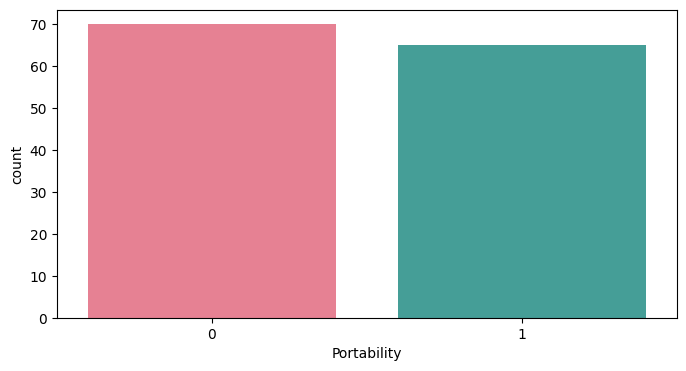

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Portability", data=data, palette='husl');

In [22]:
data.corr()

,Longitude,Latitude,Portability
Longitude,1.000000,0.000763,-0.313093
Latitude,0.000763,1.000000,-0.479845
Portability,-0.313093,-0.479845,1.000000


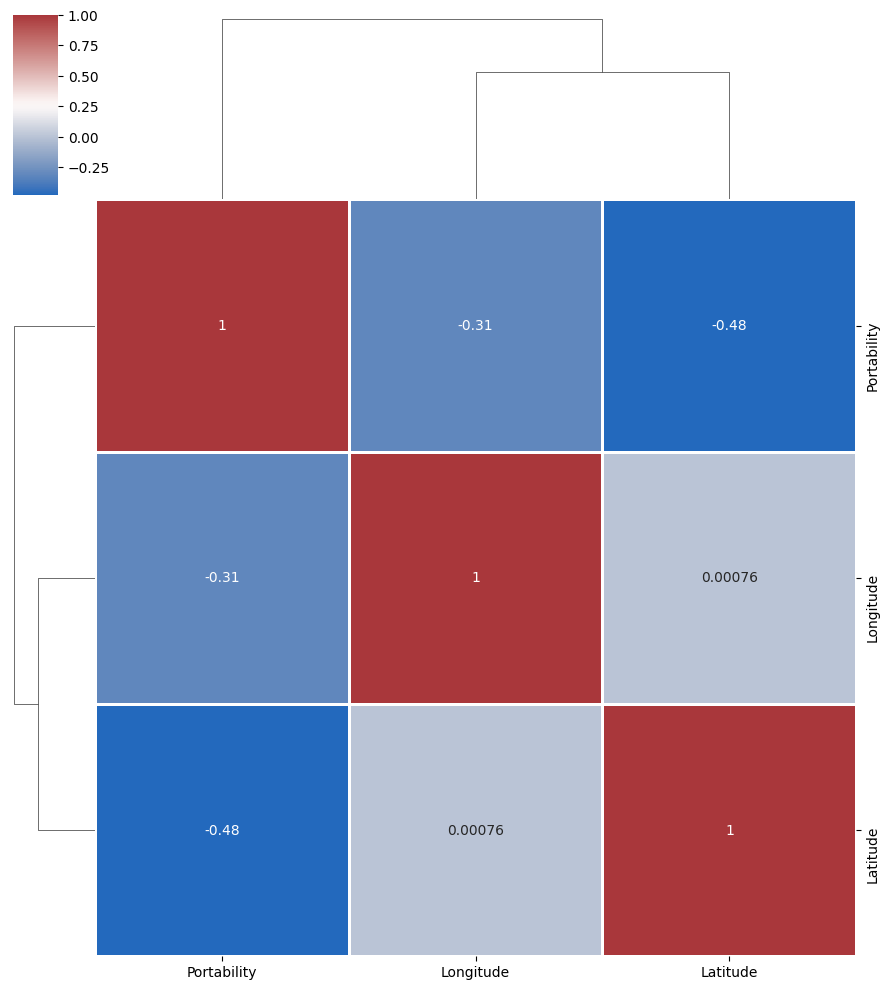

In [23]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidth = 0.8, figsize = (9,10))
plt.show()

In [24]:
data.isnull().values.any()

False

In [25]:
data.isnull().sum()

Longitude      0
Latitude       0
Portability    0
dtype: int64

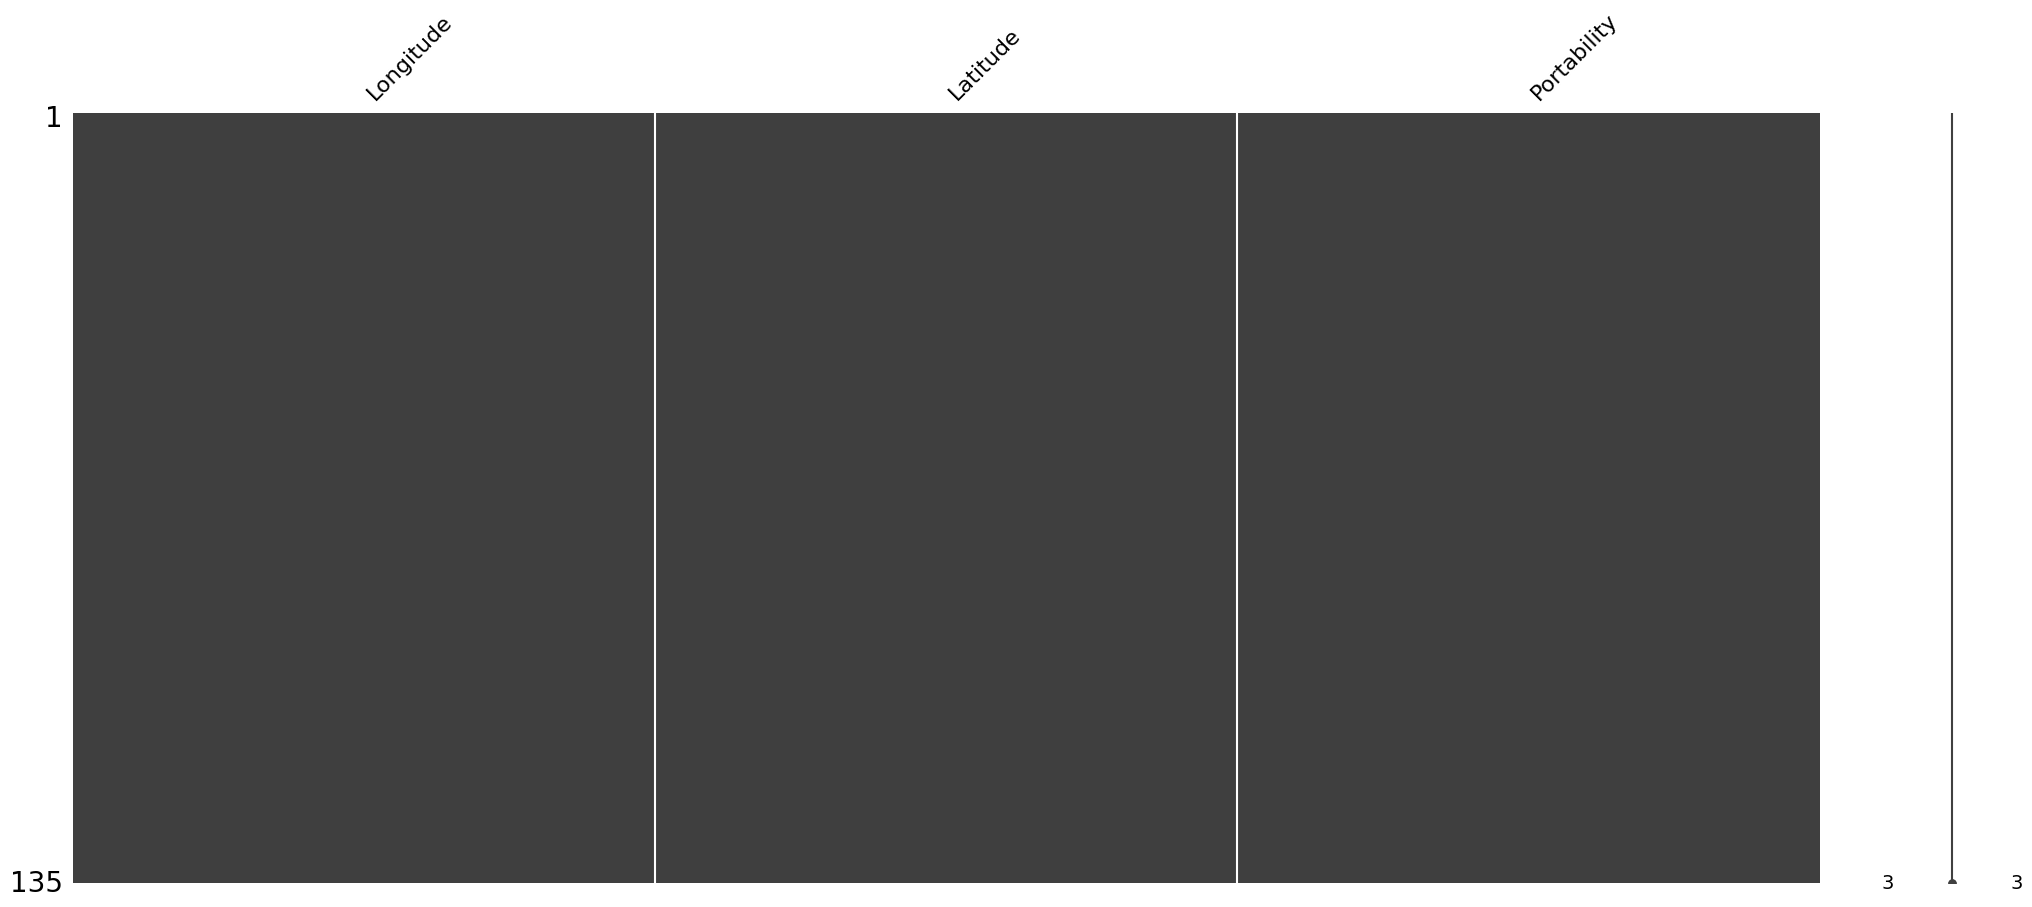

In [26]:
import missingno as msno

msno.matrix(data)
plt.show()

In [27]:
labels=data["Portability"].values
features=data.drop("Portability", axis=1).values

## Preprocessing: Normalization and Train Test Split 

In [28]:
print(type(features))
print(type(labels))

features[0]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([71.664276, 29.354066])

In [29]:
scaler= StandardScaler()
features=scaler.fit_transform(features)

print(features[0])

[-0.93578785 -1.67239428]


In [30]:
train_data, test_data, train_labels, test_labels= train_test_split(features, labels, test_size=0.10, random_state=30)

print("train_data: ",train_data.shape)
print("test_data: ",test_data.shape)
print("train_labels: ",train_labels.shape)
print("test_labels: ",test_labels.shape)

train_data:  (121, 2)
test_data:  (14, 2)
train_labels:  (121,)
test_labels:  (14,)


## Imbalance DataHandling 

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
counter = Counter(train_labels)

print('Before SMOTE', counter)
train_data, train_labels = smt.fit_resample(train_data, train_labels)
counter = Counter(train_labels)
print('\nAfter SMOTE', counter)

Before SMOTE Counter({0: 63, 1: 58})

After SMOTE Counter({0: 63, 1: 63})


# Model Architecture 

In [38]:
model=models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(2,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               768       
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [40]:
model.fit(train_data, train_labels, epochs=500, batch_size=25)

Epoch 1/500
6/6 [==============================] - 4s 8ms/step - loss: 0.7123 - accuracy: 0.4524 - precision: 0.4286 - recall: 0.2857
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5238 - precision: 0.5517 - recall: 0.2540
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5397 - precision: 0.5610 - recall: 0.3651
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.5079 - precision: 0.5200 - recall: 0.2063
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.6032 - precision: 0.6970 - recall: 0.3651
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.5556 - precision: 0.6296 - recall: 0.2698
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5397 - precision: 0.5714 - recall: 0.3175
Epoch 8/500
6/6 [==============================] - 0s 6ms/step

In [41]:
loss, acc, pre,recal=model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 486ms/step - loss: 0.1779 - accuracy: 0.8571 - precision: 0.8571 - recall: 0.8571


In [42]:
print("Test Loss: ",loss )
print("Test Accuracy: ",acc )
print("Test Precision: ",pre )
print("Test Recall: ",recal )

Test Loss:  0.17793984711170197
Test Accuracy:  0.8571428656578064
Test Precision:  0.8571428656578064
Test Recall:  0.8571428656578064


In [43]:
model.save(r"E:\Study DATA\Deep learning Projects\Water_Quality_Prediction_Project\MAWA update.h5")

In [44]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\TANZEE~1\AppData\Local\Temp\tmpihnd0l3i\assets


In [45]:
with open(r"E:\Study DATA\Deep learning Projects\Water_Quality_Prediction_Project\MAWA update Water_Quality_Prediction_Model.tflite", 'wb') as f:
    f.write(tflite)

In [68]:
def mawa(longi, lati):

    lst= np.array([longi, lati])
    lst=np.expand_dims(lst, axis=0)

    pred=model.predict(lst)
    if pred<=0.5:
        return 0
    else:
        return 1


res=mawa(76.662626, 2002.354066)
print(res)

1/1 [==============================] - 0s 59ms/step
1
